# Linear Algebra, Interpolation and Smoothing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
# read in the sample data using Pandas
#    excel sheet contains Atlanta's temperature for the last ~140 years
#
df_ATL=pd.read_excel('https://o2.eas.gatech.edu/data/ATL_MonMeanTemp.xls',skiprows=0)
df_ATL # display the dataFrame

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1894,46.7,45.0,56.7,62.0,68.8,76.4,76.2,76.4,73.4,62.1,49.5,46.1
1,1895,40.3,34.4,51.6,60.4,67.0,76.8,77.0,77.1,76.5,59.8,52.4,43.5
2,1896,41.8,45.4,49.2,65.7,74.7,75.1,78.2,80.3,74.7,61.5,55.6,44.2
3,1897,38.8,47.7,54.9,59.8,67.9,78.7,78.4,76.1,74.4,66.1,53.2,45.3
4,1898,46.8,43.1,57.5,56.5,72.8,79.2,77.9,77.2,73.6,60.2,48.5,43.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2016,42.4,48.5,60.5,64.1,71.1,81.0,83.4,82.7,78.8,69.6,58.9,48.9
123,2017,52.0,56.1,57.7,67.8,71.1,76.6,81.2,79.2,73.8,65.7,56.2,46.8
124,2018,40.4,57.3,53.5,59.8,74.8,79.8,80.8,79.7,81.0,67.4,50.3,48.6
125,2019,45.9,53.8,55.4,65.3,76.4,77.7,82.2,82.5,82.4,68.4,52.5,51.2


In [3]:
X=df_ATL['Year'].to_numpy().astype(np.float32)    # X is Year
Y=df_ATL['AUG'].to_numpy().astype(np.float32)     # Y is August temperature

## Linear regression

In [4]:
# linear regression using pseudo inverse
N=np.size(X)
m=2
A=np.zeros((N,m))
z=(X-np.mean(X))/np.std(X) # z-transform x axis
for n in np.arange(0,m):
## --- please complete the next line --##
    A[:,n]=
##-------------------------------------##

#x = np.linalg.lstsq(A,Aug,rcond=None)[0]
Apinv=np.linalg.pinv(A)
#Apinv=np.linalg.inv(A.T@A)@A.T
x=Apinv@Y

## Polynomial fit

In [5]:
#polyfit
C=np.polyfit(z,Y,m-1)

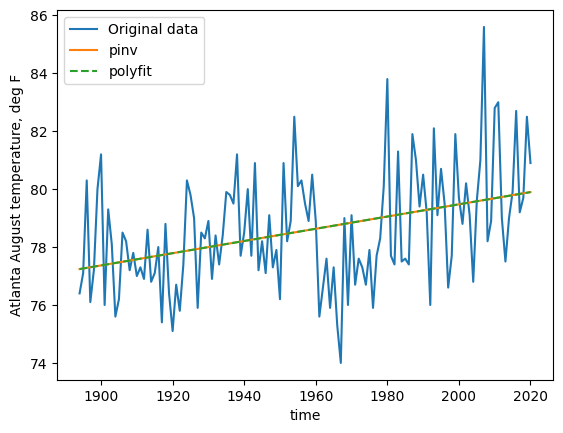

In [6]:
# calculate Yest
Yest=A@x
Yest2=np.poly1d(C)

# plot the line
plt.plot(X,Y)
plt.plot(X,Yest)
plt.plot(X,Yest2(z),'--')
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.legend(['Original data','pinv','polyfit'])
plt.show()

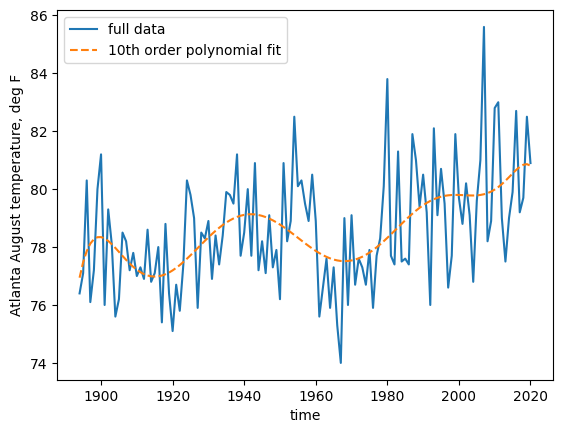

In [7]:
# 10th order polynomial fit
C=np.polyfit(z,Y,10)
yest=np.poly1d(C)
plt.plot(X,Y,'-',label='full data')
plt.plot(X,yest(z),'--',label='10th order polynomial fit')
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.legend()
plt.show()

In [8]:
# 15-year running mean
m=15
Ym = np.convolve(Y,np.ones(m),'valid')/m

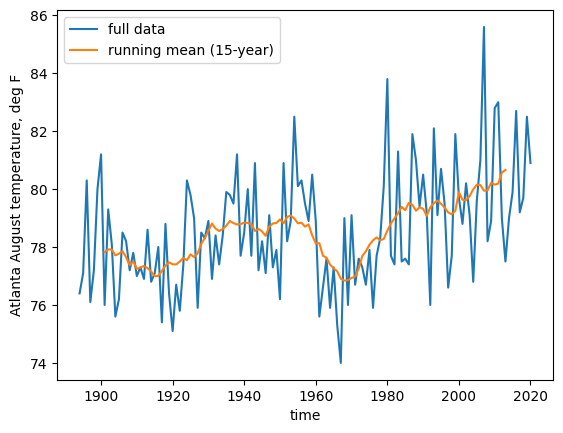

In [9]:
hm=int((m-1)/2)
plt.plot(X,Y,label='full data')
plt.plot(X[hm:-hm],Ym,label='running mean (15-year)')
plt.xlabel('time')
plt.ylabel('Atlanta August temperature, deg F')
plt.legend()
plt.show()

## Below are the data from other US cities


In [10]:
# SEATTLE
df_SEA=pd.read_excel('https://o2.eas.gatech.edu/data/SEA_MonMeanTemp.xls',skiprows=0)
# Boston
df_BOS=pd.read_excel('https://o2.eas.gatech.edu/data/BOS_MonMeanTemp.xls',skiprows=0)
# Sacramento
df_SAC=pd.read_excel('https://o2.eas.gatech.edu/data/SAC_MonMeanTemp.xls',skiprows=0)

In [11]:
# Look at Februrary temperature from the four cities
T_ATL = df_ATL['FEB'].to_numpy().astype(np.float32)
T_BOS = df_BOS['FEB'].to_numpy().astype(np.float32)
T_SEA = df_SEA['FEB'].to_numpy().astype(np.float32)
T_SAC = df_SAC['FEB'].to_numpy().astype(np.float32)

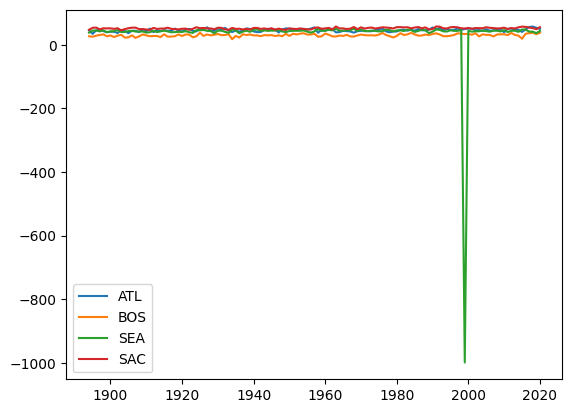

In [12]:
# plot the temperatures
plt.plot(X,T_ATL,label='ATL')
plt.plot(X,T_BOS,label='BOS')
plt.plot(X,T_SEA,label='SEA')
plt.plot(X,T_SAC,label='SAC')
plt.legend()

In [13]:
# How do you remove the bad data?
index_bad = (T_SEA<-900)
T_SEA[index_bad]=np.nan

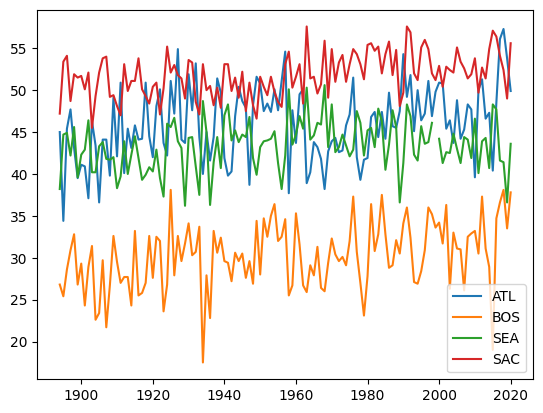

In [14]:
# plot the temperatures again
plt.plot(X,T_ATL,label='ATL')
plt.plot(X,T_BOS,label='BOS')
plt.plot(X,T_SEA,label='SEA')
plt.plot(X,T_SAC,label='SAC')
plt.legend()

The coefficients are [nan nan nan nan nan nan nan nan nan nan nan]


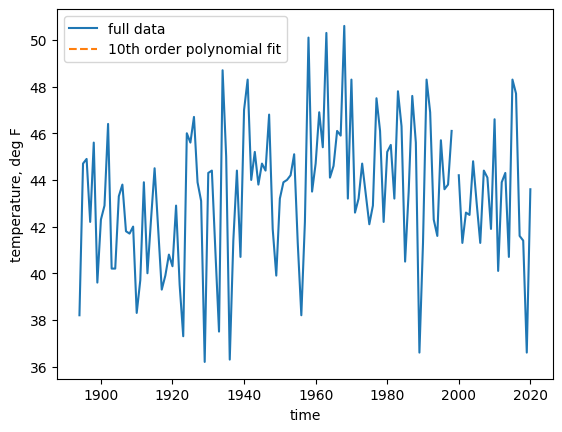

In [15]:
# 10th order polynomial fit
Y = T_SEA
C=np.polyfit(z,Y,10)
print(f'The coefficients are {C}')
yest=np.poly1d(C)
plt.plot(X,Y,'-',label='full data')
plt.plot(X,yest(z),'--',label='10th order polynomial fit')
plt.xlabel('time')
plt.ylabel('temperature, deg F')
plt.legend()
plt.show()

R-value between BOS and ATL = 0.574


Text(0, 0.5, 'Boston')

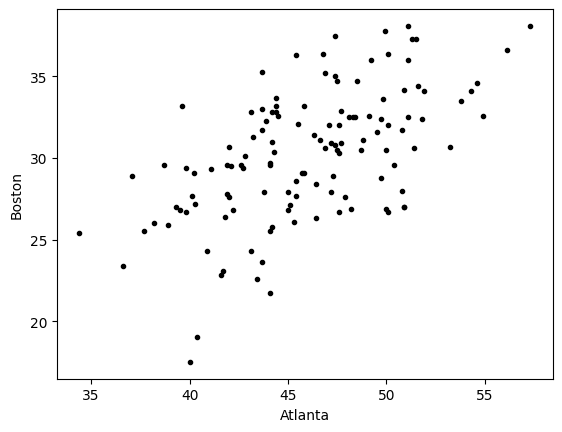

In [16]:
# Calculate the correlation between BOS and ATL
rval = np.corrcoef(T_BOS,T_ATL)
print(f'R-value between BOS and ATL = {rval[0,1]:.3}')
plt.plot(T_ATL,T_BOS,'k.')
plt.xlabel('Atlanta')
plt.ylabel('Boston')